# CPM / PERT
![PERT](https://upload.wikimedia.org/wikipedia/commons/b/b9/Pert_chart_colored.gif)
#### CPM(Critical Path Method, CPM)
...
#### PERT
...
</br>
#### 진행상황, Progress Status
- Create Node[O]
- Graph Visualization[O]
- CPM
    - Forward calculation[O]
    - Backward calculation[...}
- PERT
    - Time calculation[...]
    - Forward calculation[...]
    - Backward calculation[...]

- Interface?
    - Node Information Input

## Create node, Forward calculation, Backward calculation

In [318]:
from queue import Queue
# node # = 0, 1, 2, ...
# direction "row to column"
class dir_graph_pert():
    def __init__(self,node_map=[],node_weight_map=[],virtual_link=[]):
        self.node_map=node_map
        self.virtual_link=virtual_link
        self.node_weight_map=node_weight_map
        self.total_node_map = []
        self.forward_value = []
    def component_print(self):
        for i in range(0,len(self.node_map)):
            print(i,"||-> ",end=' ')
            for j in range(0,len(self.node_map[i])):
                print(self.node_map[i][j],end=' ')
            print("")
            
    def set_node_map(self,node_map_input):
        if len(self.node_map) == 0:
            self.node_map = node_map_input
            for i in range(0,len(self.node_map)):
                self.node_map[i].sort()
            print("Successfully Geneated Node")
        else:
            print("Plz Clear Node")
    def add_node(self,num_node):
        #인접 리스트 행 추가
        for i in range(0,num_node):
            self.node_map.append([])
        
    # direction "row to column"
    def add_conn(self,from_,to_):
        #인접 리스트 행 내 칼럼 추가
        if from_ < len(self.node_map) and to_ < len(self.node_map):
            print("Input Node Number is valid from ("+str(from_)+") to ("+str(to_)+") ")
            self.node_map[from_].append(to_)
            for i in range(0,len(self.node_map)):
                self.node_map[i].sort()
        else:
            print("Plz Input Node Number Check")
        
    def graph_clear(self):
        self.node_map=[]
        
    def get_node_map(self):
        return self.node_map

    def forward_calc(self):
        print("forward calculating...")
        que = Queue()
        #BFS로는 안됨, 중복 방문 허용 되어야 하기 때문에(중복 방문 후 더 오래걸리는 시간으로 등록)
        #node_weight_map과 virtual_link 통합
        self.total_node_map = self.node_weight_map[:]
        #print(self.total_node_map)
        for i in range(0,len(self.virtual_link)):
            temp = self.virtual_link[i]
            self.total_node_map[temp[0]].append([temp[1],0])
        for i in range(0,len(self.total_node_map)):
            self.forward_value.append(0)
        print("Forward Node Value Init. = ",self.forward_value)
        que.put(0)
        
        while que.empty() == False:
            cur_node = que.get()
            cur_time = self.forward_value[cur_node]
            next_node = self.total_node_map[cur_node]
            #next_node[i][0] : 다음 노드 번호
            #next_node[i][1] : 현재 노드에서 다음 노드까지 걸리는 시간
            for i in range(0,len(next_node)):
                que.put(next_node[i][0]) # Queue에 쌓기
                next_time = cur_time+next_node[i][1] # time 더하기 : 현재 까지 걸린 시간 + 현재 노드에서 다음 노드까지 걸리는 시간
                if next_time > self.forward_value[next_node[i][0]]:# time 더하기 결과 값이 원래 걸려있는 노드보다 커야 바꿈.
                    self.forward_value[next_node[i][0]] = next_time
        print("forward calculation result = ",self.forward_value)        
    
    def backward_calc(self):
        print("backward calculating...")

## Graph Visualization

In [326]:
import math
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import numpy as np
class plot_node_graph():
    def __init__(self,node_map,node_weight_map=[],virtual_link=[],dist=15,radius=2):
        print('plot_node_graph')
        self.node_map = node_map
        self.virtual_link = virtual_link
        self.node_weight_map=node_weight_map
        self.coordinates = []
        self.coord_flag = []
        self.flag = []
        self.forward_link = []
        self.dist=dist
        self.radius=radius
    # -45 ~ 45 기준 이면, 출발각 : -45, 스텝각 : 90/n, 종점각 : 45
    def R_trans(self,theta,vector):
        if type(vector) == list:
            return_vec = np.dot(np.array([[math.cos(theta),-math.sin(theta)],[math.sin(theta),math.cos(theta)]]),np.array(vector))
        elif type(vector) == nd.ndarray:
            return_vec = np.dot(np.array([[math.cos(theta),-math.sin(theta)],[math.sin(theta),math.cos(theta)]]),vector)
        return return_vec
    def calc_col_row(self):
        #print('column, row calculating')
        # [0,0]으로 초기화
        for i in range(0,len(self.node_map)):
            self.coordinates.append([0,0])
            self.coord_flag.append(0)
            self.flag.append(0)
            self.forward_link.append(0)
        # 좌표 대입    
        self.flag[0] = 1
        self.coord_flag[0]=1
        for i in range(0,len(self.node_map)): #Row의수 = len(node_map)
            for j in range(0,len(self.node_map[i])):
                #print("current node_map["+str(i)+"]["+str(j)+"] = ",str(self.node_map[i][j]))
                if self.flag[self.node_map[i][j]] == 0:
                    self.flag[self.node_map[i][j]] = 1
                    self.forward_link[i] = self.forward_link[i] + 1
                    
            #print("forward_link="+str(self.forward_link[i]))
            for j in range(0,len(self.node_map[i])):
                if self.forward_link[i] != 0:
                    start_theta = 45
                    end_theta = -45
                    
                    if self.forward_link[i] > 1:
                        if j == 0:# start 각
                            theta = start_theta
                        elif j == self.forward_link[i]-1:# end 각
                            theta = end_theta
                        else:
                            theta = start_theta-j*(90/(self.forward_link[i]-1))
                        
                        #print(str(i)+"->"+str(self.node_map[i][j])+","+str(self.node_map[i][j])+" theta = "+str(theta))
                        #print(str(i)+"-->"+str(self.node_map[i][j])+"의,"+str(i)+"와"+str(self.node_map[i][j])+"사이의 theta = "+str(theta))
                        if self.coord_flag[self.node_map[i][j]] == 0:
                            self.coordinates[self.node_map[i][j]] = list(np.array(self.coordinates[i])+self.R_trans(theta,[self.dist,0]))
                            #print(self.coordinates)
                            self.coord_flag[self.node_map[i][j]]=1
                    elif self.forward_link[i] == 1:
                        theta = 0
                        #print(str(i)+"->"+str(self.node_map[i][j])+" theta = "+str(theta))
                        if self.coord_flag[self.node_map[i][j]] == 0:
                            self.coordinates[self.node_map[i][j]] = list(np.array(self.coordinates[i])+self.R_trans(theta,[self.dist,0]))
                            #print(self.coordinates)
                            self.coord_flag[self.node_map[i][j]]=1
                #else:
                    #print("No Forward Link")
            
        #print(self.forward_link)
    def node_plotting(self):
        print('plotting...')
        coords = np.array(self.coordinates)
        X=np.array([coords[:,0].min()-5,coords[:,0].max()+5])
        Y=np.array([coords[:,1].min()-5,coords[:,1].max()+5])

        plt.plot(X,Y,color='None')
        plt.axis('equal')
        ax = plt.gca()
        ax.axes.xaxis.set_visible(False)
        ax.axes.yaxis.set_visible(False)
        for i in range(0,len(self.coordinates)):
            x = self.coordinates[i][0]
            y = self.coordinates[i][1]
            #circle
            shp=patches.Circle((x,y), radius=self.radius, facecolor='lightgray',
                              edgecolor='black')
            plt.text(x-self.radius/15,y-self.radius/15,str(i),size=10)
            plt.gca().add_patch(shp)

    def arrow_plotting(self):
        coords = np.array(self.coordinates)
        for i in range(0,len(self.node_map)):
            for j in range(0,len(self.node_map[i])):
                # i --> self.node_map[i][j]
                plt.annotate('',
                xy = (coords[self.node_map[i][j],0], coords[self.node_map[i][j],1]),
                xytext = (coords[i,0], coords[i,1]),
                arrowprops = dict(facecolor='black', width=1, shrink=0.1, headwidth=10))


    def virtual_arrow(self):
        for i in range(0,len(self.virtual_link)):
            from_ = self.virtual_link[i][0]
            to_ = self.virtual_link[i][1]
            plt.annotate('',
            xy = (self.coordinates[to_][0],self.coordinates[to_][1]),
            xytext = (self.coordinates[from_][0],self.coordinates[from_][1]),
            arrowprops = dict(color='lightgray', width=1, shrink=0.1, headwidth=10))
    
    def weight_plotting(self):
        for i in range(0,len(self.node_weight_map)):
            for j in range(0,len(self.node_weight_map[i])):
                # from "i" to "j"
                from_ = i
                to_ = node_weight_map[i][j][0]
                p1 = self.coordinates[from_]
                p2 = self.coordinates[to_]
                if p2[0]-p1[0]>0 and p2[1]-p1[1]>0:
                    p = [(p1[0]+p2[0])*0.5,(p1[1]+p2[1])*0.35]
                else:
                    p = [(p1[0]+p2[0])*0.5,(p1[1]+p2[1])*0.5]
                plt.text(p[0],p[1],str(node_weight_map[i][j][1]),color='r',backgroundcolor='lightgray',fontsize=8)
    
    def forward_plotting(self,forward_value):
        for i in range(0,len(forward_value)):
            p = self.coordinates[i]
            shift = 3
            if p[1]>=0:
                plt.text(p[0]-shift,p[1]+shift,"TE:"+str(forward_value[i]),backgroundcolor='lightblue',fontsize=8)
            elif p[1]<0:
                plt.text(p[0]-shift,(p[1]-shift),"TE:"+str(forward_value[i]),backgroundcolor='lightblue',fontsize=8)
    
    def drawing(self):
        plt.show()

## Node graph 생성 및 forward 계산
- node_map : virtual link 제외 순수 node와 link에 대한 정보 기입 </br>
※ [[node 0 links],[node 1 links],...]
- node_weigth_map : node_map + node to node의 weight 정보 기입</br>
※ [[[node 0 link_1,weight_1],[node 0 link_2,weight_2],..],[node 1 link_1,weight_1],[node 1 link_2,weight_2],..],...]
- virtual_link : virtual link에 대한 정보
※ dir_graph_pert(virtual_link=[[from node, to node]])

In [327]:
node_map = [[1,2,3],[4],[6],[5],[8],[7],[8],[8],[9],[]]
node_weight_map = [[[1,1],[2,2],[3,3]],[[4,1]],[[6,6]],[[5,7]],[[8,1]],[[7,3]],[[8,9]],[[8,3]],[[9,10]],[]]
grp = dir_graph_pert(node_map = node_map,node_weight_map=node_weight_map,virtual_link=[[1,2]])
grp.forward_calc()

forward calculating...
Forward Node Value Init. =  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
forward calculation result =  [0, 1, 2, 3, 2, 10, 8, 13, 17, 27]


## Node graph Plot

In [328]:
node_map = [[1,2,3],[4],[6],[5],[8],[7],[8],[8],[9],[]]
node_weight_map = [[[1,1],[2,2],[3,3]],[[4,1]],[[6,6]],[[5,7]],[[8,1]],[[7,3]],[[8,9]],[[8,3]],[[9,10]],[]]
grpplt = plot_node_graph(node_map=node_map,node_weight_map=node_weight_map,virtual_link=[[1,2]])
grpplt.calc_col_row()
print(len(node_weight_map))
print(len(node_weight_map[0]))

plot_node_graph
10
3


plotting...


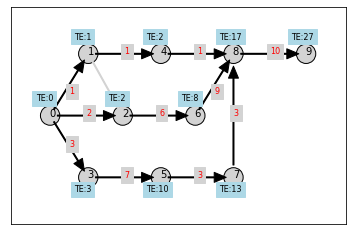

In [329]:
grpplt.node_plotting()
grpplt.arrow_plotting()
grpplt.virtual_arrow()
grpplt.weight_plotting()
grpplt.forward_plotting(grp.forward_value)
grpplt.drawing()

### Example 2

In [330]:
node_map = [[1,2],[3],[3],[]]
node_weight_map = [[[1,10],[2,7]],[[3,6]],[[3,8]],[]]
virtual_link = [[1,2]]
grp = dir_graph_pert(node_map = node_map,node_weight_map=node_weight_map,virtual_link=virtual_link)
grp.forward_calc()

forward calculating...
Forward Node Value Init. =  [0, 0, 0, 0]
forward calculation result =  [0, 10, 10, 18]


In [331]:
grpplt = plot_node_graph(node_map=node_map,node_weight_map=node_weight_map,virtual_link=virtual_link)
grpplt.calc_col_row()

plot_node_graph


plotting...


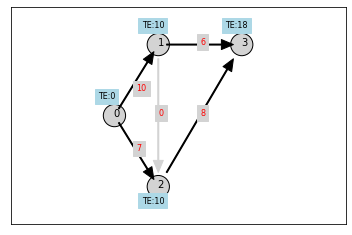

In [332]:
grpplt.node_plotting()
grpplt.arrow_plotting()
grpplt.virtual_arrow()
grpplt.weight_plotting()
grpplt.forward_plotting(grp.forward_value)
grpplt.drawing()

### Example 3

In [335]:
node_map = [[1,2,3],[4],[6],[5],[8],[7],[8],[8],[9],[]]
node_weight_map = [[[1,4],[2,4],[3,5]],[[4,5]],[[6,5]],[[5,2]],[[8,6]],[[7,2]],[[8,3]],[[8,4]],[[9,5]],[]]
virtual_link = [[2,3],[5,6]]
grp = dir_graph_pert(node_map = node_map,node_weight_map=node_weight_map,virtual_link=virtual_link)
grp.forward_calc()

forward calculating...
Forward Node Value Init. =  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
forward calculation result =  [0, 4, 4, 5, 9, 7, 9, 9, 15, 20]


In [336]:
grpplt = plot_node_graph(node_map=node_map,node_weight_map=node_weight_map,virtual_link=virtual_link)
grpplt.calc_col_row()

plot_node_graph


plotting...


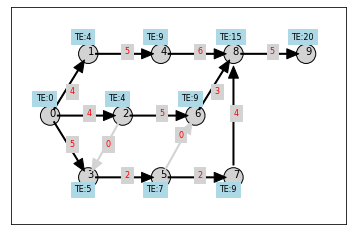

In [337]:
grpplt.node_plotting()
grpplt.arrow_plotting()
grpplt.virtual_arrow()
grpplt.weight_plotting()
grpplt.forward_plotting(grp.forward_value)
grpplt.drawing()